### Load csv data


In [24]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [25]:
import unicodedata
def strip_accents(text):
  try:
    text = unicode(text, 'utf-8')
  except NameError: # unicode is a default on python 3 
    pass

  text = unicodedata.normalize('NFD', text)\
          .encode('ascii', 'ignore')\
          .decode("utf-8")

  return str(text)

In [26]:
import pandas as pd

In [27]:
dataset_folder = '/content/drive/MyDrive/Dengue forecasting with Satellite Images/dataset/'
csv = dataset_folder + 'csv/1029_Municipalities_cases.csv'
df = pd.read_csv(csv)
df['Municipality'] = df['Municipality'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')
print(df.head())

print(df.columns)
print(len(df))
print(len(df.Municipality.unique()))
print(len(df.epiweek.unique()))
print(min(df.epiweek.unique()))
print(max(df.epiweek.unique()))

    epiweek  Cases  Municipality code Municipality
0  2016/w01    235               5001     Medellin
1  2016/w02    274               5001     Medellin
2  2016/w03    252               5001     Medellin
3  2016/w04    262               5001     Medellin
4  2016/w05    274               5001     Medellin
Index(['epiweek', 'Cases', 'Municipality code', 'Municipality'], dtype='object')
160524
955
156
2016/w01
2018/w52


In [28]:
import os
import unicodedata
import matplotlib.pyplot as plt

five_img_folder = dataset_folder + 'image/5_cities/'
five_city_dic = {}
city_ls = []

for city in os.listdir(five_img_folder):
  unaccented_city = strip_accents(city)
  city_ls.append(unaccented_city)
  selected_df = df.loc[df['Municipality'] == unaccented_city].reset_index()
  five_city_dic[city] = {}
  five_city_dic[city]['structured'] = selected_df
  print(unaccented_city + ': ' + str(len(selected_df)))

Cali: 156
Cucuta: 156
Ibague: 156
Medellin: 156
Villavicencio: 156


### Add image location to files

In [ ]:
for city in five_city_dic:
  print(city)
  print(five_city_dic[city]['structured'].epiweek)

Cali
0      2016/w01
1      2016/w02
2      2016/w03
3      2016/w04
4      2016/w05
         ...   
151    2018/w48
152    2018/w49
153    2018/w50
154    2018/w51
155    2018/w52
Name: epiweek, Length: 156, dtype: object
Cúcuta
0      2016/w01
1      2016/w02
2      2016/w03
3      2016/w04
4      2016/w05
         ...   
151    2018/w48
152    2018/w49
153    2018/w50
154    2018/w51
155    2018/w52
Name: epiweek, Length: 156, dtype: object
Ibagué
0      2016/w01
1      2016/w02
2      2016/w03
3      2016/w04
4      2016/w05
         ...   
151    2018/w48
152    2018/w49
153    2018/w50
154    2018/w51
155    2018/w52
Name: epiweek, Length: 156, dtype: object
Medellín
0      2016/w01
1      2016/w02
2      2016/w03
3      2016/w04
4      2016/w05
         ...   
151    2018/w48
152    2018/w49
153    2018/w50
154    2018/w51
155    2018/w52
Name: epiweek, Length: 156, dtype: object
Villavicencio
0      2016/w01
1      2016/w02
2      2016/w03
3      2016/w04
4      2016/w05
   

### Preprocess

In [ ]:
!pip install epiweeks
from epiweeks import Week, Year
from datetime import date

In [30]:
def get_epi_week(origin_str):
  date_ls = origin_str.split('-')
  return Week.fromdate(date(int(date_ls[0]), int(date_ls[1]), int(date_ls[2])))

201601 201752


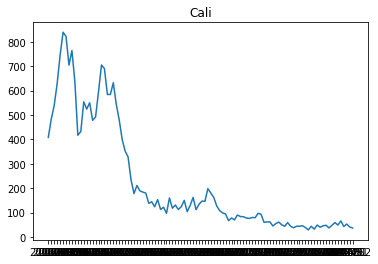

201601 201752


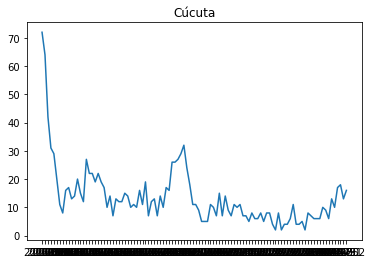

201601 201752


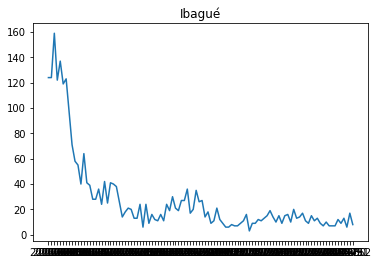

201601 201752


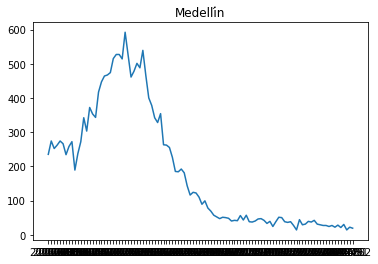

201601 201752


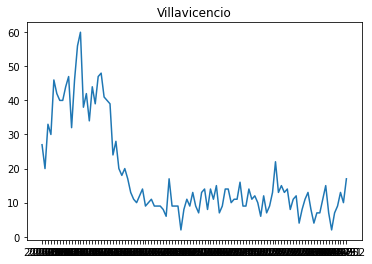

In [32]:
dataset_folder = '/content/drive/MyDrive/Dengue forecasting with Satellite Images/dataset/'
img_main_folder = dataset_folder + 'image/5_cities/'
csv_main_folder = dataset_folder + 'csv/5_cities_with_img_path'

for city in os.listdir(img_main_folder):
  path = os.path.join(img_main_folder, city)
  df = five_city_dic[city]['structured']
  df['img_loc'] = ''

  for img_name in os.listdir(path):
    if not img_name.endswith('.tiff'):
      continue
    new_img_name = ''.join(i for i in img_name if i.isdigit() or i == '-')    
    img_epi_week = str(get_epi_week(new_img_name))

    df['epiweek'] = df['epiweek'].str.replace('/w','')
    index = df.index[df['epiweek'].astype(str) == img_epi_week]
    
    if len(index) == 1:
      df.loc[index, 'img_loc'] = f'{path}/{img_name}'
    # else:
      # print('[No cases match]', img_name, index)
      # tmp_df = df[df['epiweek'] == img_epi_week]
      # print(tmp_df['epiweek'].tolist(), tmp_df['Municipality'].tolist(), tmp_df['Cases'].tolist())

  csv_path = os.path.join(csv_main_folder, city + '.csv')
  df_with_img = df[df['img_loc'] != '']
  df_with_img.to_csv(csv_path, index=False)

  x = df_with_img['epiweek']
  y = df_with_img['Cases']
  print(min(x), max(x))
  plt.plot(x, y)
  plt.title(city)
  plt.show()